In [ ]:
#training dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

#validation dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip



--2024-03-07 11:39:00--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 209.85.145.207, 172.217.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.3’

horse-or-human.zip. 100%[===================>] 142.65M   257MB/s    in 0.6s    

2024-03-07 11:39:01 (257 MB/s) - ‘horse-or-human.zip.3’ saved [149574867/149574867]

--2024-03-07 11:39:01--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.207, 209.85.145.207, 172.217.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [ ]:
#unzip the data
import zipfile

local_zip='./horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

model=tf.keras.models.Sequential([
    #1st convolution (also innput laye hence, has shape)
    Conv2D (16, (3,3), activation='relu', input_shape=(300,300,3)),
    MaxPooling2D(2,2),

    #2nd convolution
    Conv2D (32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #3rd convolution
    Conv2D (64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #4th convolution
    Conv2D (64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #5th convolution
    Conv2D (64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    #flatten the results to feed into the DNN
    Flatten(),

    #512 neuron hidden layer
    Dense(512, activation='relu'),

    Dropout(0.5),
    #only 1 output neuron. It will contain a value from 0-1 where 0 for "horses"
    # and 1 for "humans"
    Dense(1, activation='sigmoid')
])

#summarise the model architecture
model.summary()

#compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

#create the image generator
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

#train the model with .fit
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=14,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [ ]:
#save the model in a json for future references as we dont have to train the model again and again
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("m.h5")

Populating the interactive namespace from numpy and matplotlib


Saving GhodaManus.jpeg to GhodaManus.jpeg
1/1 [==============================] - 0s 19ms/step


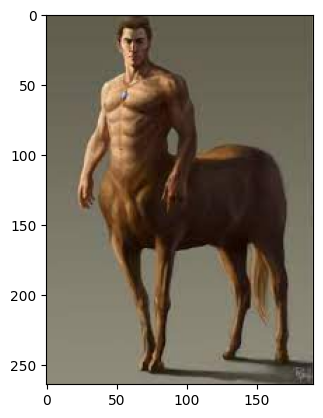

GhodaManus.jpeg is a human



In [ ]:
%pylab inline
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()
for fn in uploaded.keys():
  print(fn)
  #predicting the images
  path='/content/'+fn
  img = image.load_img(path, target_size=(300,300))
  X=image.img_to_array(img)
  X/=255
  X=np.expand_dims(X, axis=0)

  images = np.vstack([X])
  classes=model.predict(images, batch_size=10)

  if classes[0]>0.5:
    img= mpimg.imread(path)
    imgplot=plt.imshow(img)
    plt.show()

    print(fn + " is a human")
    print()

  else:
    img= mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

    print(fn + " is a human")
    print()


# New Section

In [ ]:
'''
sigmoid: binary classification
softmax: multiple classification and tells probability of all classes

parameters are the features our model is learning

validation verbose=1 gives all info while epochs run
medium, towards data science websites
'''